Data Collection and Preprocessing:

In [2]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('OnlineRetail.csv' , encoding='latin1')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

# Check for missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Check for missing values again to confirm
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert data types
df['CustomerID'] = df['CustomerID'].astype(str)

# Display the data types
print("\nData Types:")
print(df.dtypes)

# Create a new feature for total spend
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# Display the first few rows to check the new feature
print("\nData with TotalSpend Feature:")
print(df.head())

# Normalize numerical features
scaler = StandardScaler()
df[['Quantity', 'UnitPrice', 'TotalSpend']] = scaler.fit_transform(df[['Quantity', 'UnitPrice', 'TotalSpend']])

# Display the first few rows to check the normalization
print("\nNormalized Data:")
print(df.head())

# Save the preprocessed data to a new CSV file
df.to_csv('OnlineRetail_Preprocessed.csv', index=False)
print("\nPreprocessed data saved to OnlineRetail_Preprocessed.csv")


Initial Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Missing Values Before Handling:
InvoiceNo          0
StockCode          0
Description      325
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     37935
Country            

Exploratory Data Analysis (EDA):

Initial Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.027491   
1    536365     71053                  WHITE METAL LANTERN -0.027491   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.019069   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.027491   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.027491   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalSpend  
0  12/1/2010 8:26  -0.012611     17850.0  United Kingdom   -0.020937  
1  12/1/2010 8:26  -0.003651     17850.0  United Kingdom   -0.003129  
2  12/1/2010 8:26  -0.010478     17850.0  United Kingdom    0.002736  
3  12/1/2010 8:26  -0.003651     17850.0  United Kingdom   -0.003129  
4  12/1/2010 8:26  -0.003651     17850.0  United Kingdom   -0.003129  

Summary Statistics:
           Quantity     UnitPrice     CustomerID    TotalSpend
count  2.048140e+05  2.048140e+05  204814.0

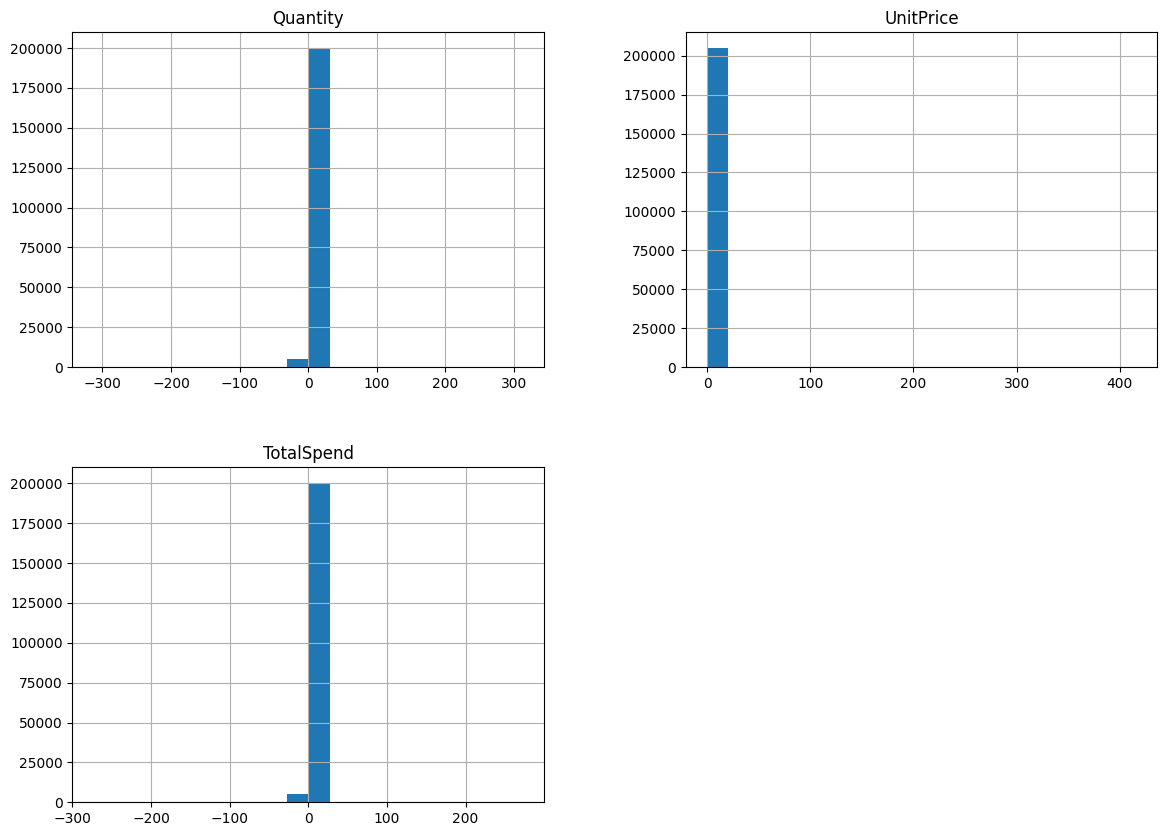


Plotting Country Distribution...


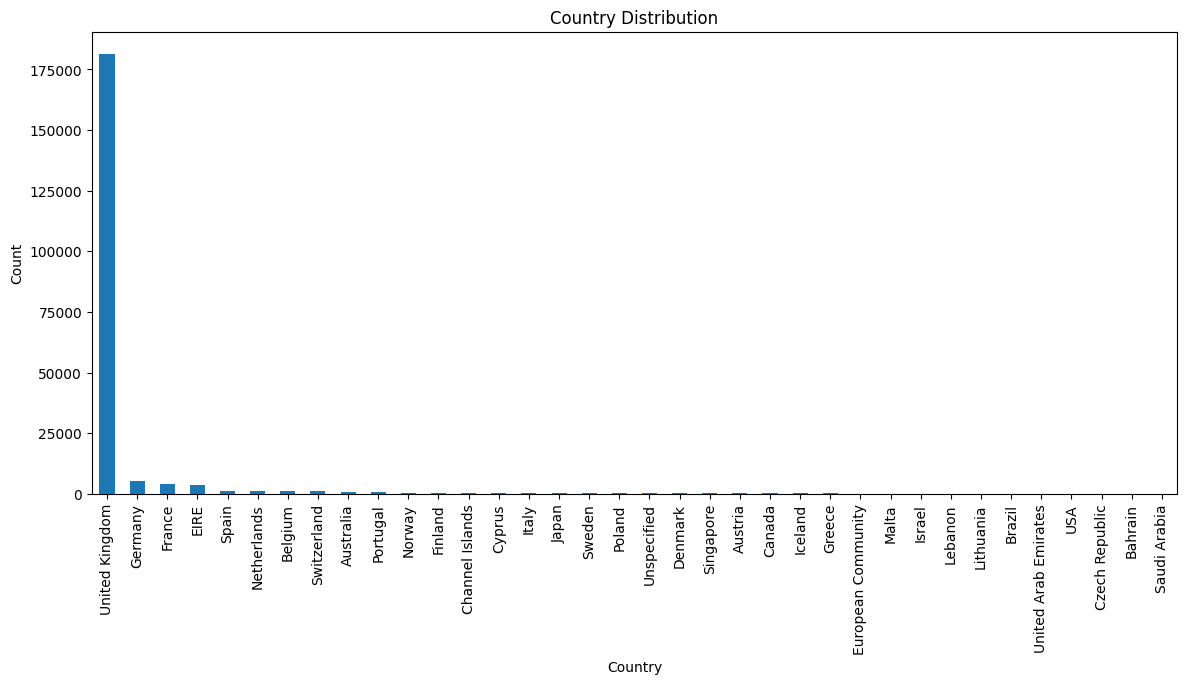


Plotting Correlation Heatmap...


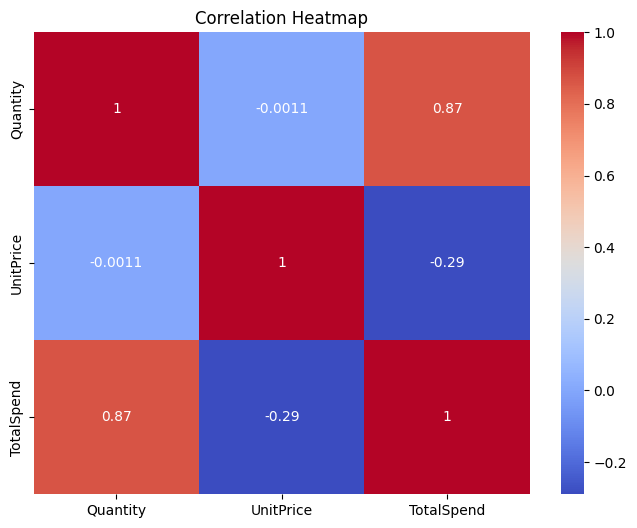

In [1]:
!pip install seaborn
!pip install matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Plot histograms for numerical features
print("\nPlotting Histograms...")
df[['Quantity', 'UnitPrice', 'TotalSpend']].hist(bins=20, figsize=(14, 10))
plt.show()

# Pair plot to visualize relationships
# print("\nPlotting Pair Plot...")
# sns.pairplot(df[['Quantity', 'UnitPrice', 'TotalSpend']])
# plt.show()

# Bar plot for Country distribution
print("\nPlotting Country Distribution...")
plt.figure(figsize=(14, 6))
df['Country'].value_counts().plot(kind='bar')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
print("\nPlotting Correlation Heatmap...")
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalSpend']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Feature Engineering:

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed data
df = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

# Create a new feature for frequency of purchases per customer
frequency = df.groupby('CustomerID').InvoiceNo.nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Merge this feature back to the original dataframe
df = df.merge(frequency, on='CustomerID')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new feature for recency (days since last purchase)
max_date = df['InvoiceDate'].max()
df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (max_date - x.max()).days)

# Create a new feature for average spend per purchase
average_spend = df.groupby('CustomerID').TotalSpend.mean().reset_index()
average_spend.columns = ['CustomerID', 'AvgSpend']

# Merge this feature back to the original dataframe
df = df.merge(average_spend, on='CustomerID')

# Select features to normalize
features_to_normalize = ['Frequency', 'Recency', 'AvgSpend']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the selected features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Display the first few rows to check the new features
print("\nData with New Features:")
print(df.head())


Initial Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.015583   
1    536365     71053                  WHITE METAL LANTERN -0.015583   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.010465   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.015583   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.015583   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalSpend  
0  12/1/2010 8:26  -0.072978     17850.0  United Kingdom   -0.014875  
1  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  
2  12/1/2010 8:26  -0.054154     17850.0  United Kingdom    0.001485  
3  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  
4  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  

Data with New Features:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE 

Clustering:

Initial Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.015583   
1    536365     71053                  WHITE METAL LANTERN -0.015583   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.010465   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.015583   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.015583   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalSpend  
0  12/1/2010 8:26  -0.072978     17850.0  United Kingdom   -0.014875  
1  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  
2  12/1/2010 8:26  -0.054154     17850.0  United Kingdom    0.001485  
3  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  
4  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

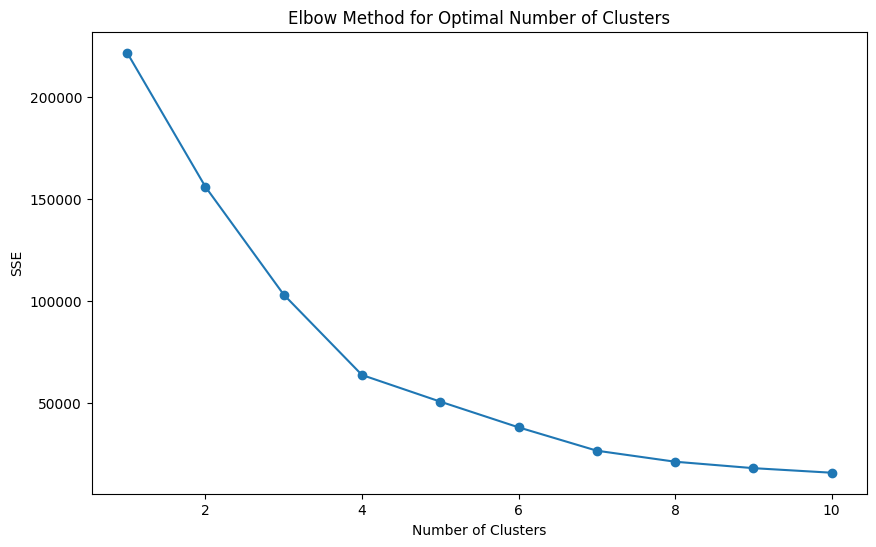

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Data with Clusters:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.015583   
1    536365     71053                  WHITE METAL LANTERN -0.015583   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.010465   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.015583   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.015583   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSpend  \
0 2010-12-01 08:26:00  -0.072978     17850.0  United Kingdom   -0.014875   
1 2010-12-01 08:26:00   0.006083     17850.0  United Kingdom   -0.002568   
2 2010-12-01 08:26:00  -0.054154     17850.0  United Kingdom    0.001485   
3 2010-12-01 08:26:00   0.006083     17850.0  United Kingdom   -0.002568   
4 2010-12-01 08:26:00   0.006083     17850.0  United Kingdom   -0.002568   

   Frequency   Recency  AvgSpend  Cluster  
0   3.313652 -0.144891 -0.072995        1  
1

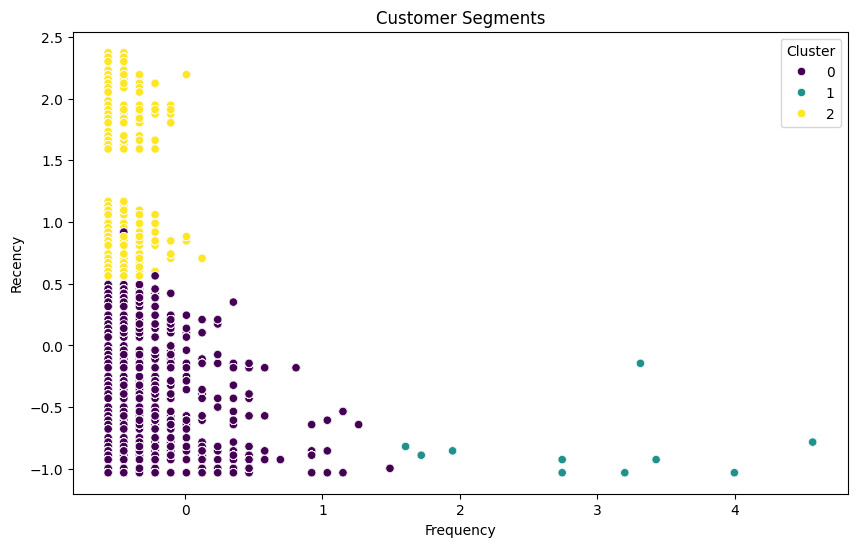

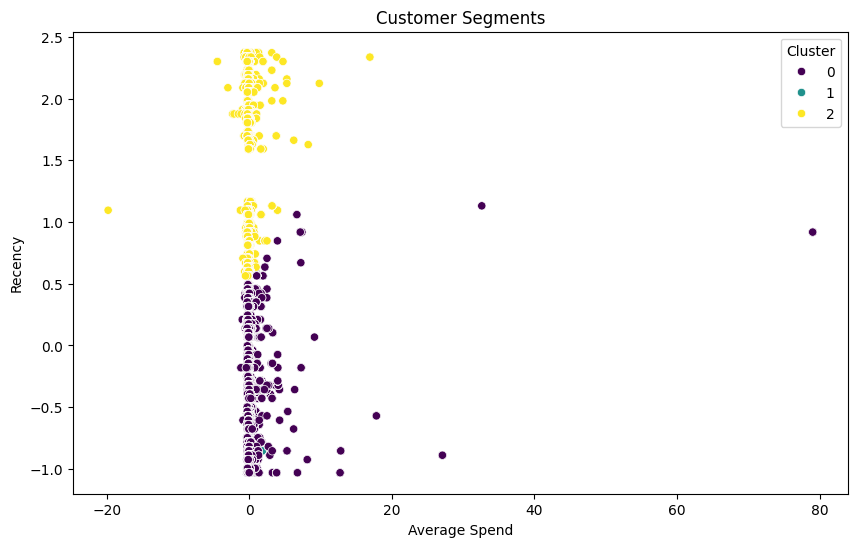

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed and feature-engineered data
df = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

frequency = df.groupby('CustomerID').InvoiceNo.nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Merge this feature back to the original dataframe
df = df.merge(frequency, on='CustomerID')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new feature for recency (days since last purchase)
max_date = df['InvoiceDate'].max()
df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (max_date - x.max()).days)

# Create a new feature for average spend per purchase
average_spend = df.groupby('CustomerID').TotalSpend.mean().reset_index()
average_spend.columns = ['CustomerID', 'AvgSpend']

# Merge this feature back to the original dataframe
df = df.merge(average_spend, on='CustomerID')

# Select features to normalize
features_to_normalize = ['Frequency', 'Recency', 'AvgSpend']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the selected features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Select the features for clustering
features = df[['Frequency', 'Recency', 'AvgSpend']]

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plot the SSE values for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Apply KMeans with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Display the first few rows to check the clusters
print("\nData with Clusters:")
print(df.head())

# Analyze clusters
for cluster in range(optimal_clusters):
    print(f'\nCluster {cluster} Summary:')
    print(df[df['Cluster'] == cluster].describe())

# Plot the clusters
print("\nPlotting Clusters...")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Frequency', y='Recency', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

# Another plot for AvgSpend vs Recency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AvgSpend', y='Recency', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Average Spend')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()


Cluster Analysis:

Initial Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.015583   
1    536365     71053                  WHITE METAL LANTERN -0.015583   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.010465   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.015583   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.015583   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalSpend  
0  12/1/2010 8:26  -0.072978     17850.0  United Kingdom   -0.014875  
1  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  
2  12/1/2010 8:26  -0.054154     17850.0  United Kingdom    0.001485  
3  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  
4  12/1/2010 8:26   0.006083     17850.0  United Kingdom   -0.002568  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Data with Cluster Labels:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.015583   
1    536365     71053                  WHITE METAL LANTERN -0.015583   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.010465   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.015583   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.015583   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSpend  \
0 2010-12-01 08:26:00  -0.072978     17850.0  United Kingdom   -0.014875   
1 2010-12-01 08:26:00   0.006083     17850.0  United Kingdom   -0.002568   
2 2010-12-01 08:26:00  -0.054154     17850.0  United Kingdom    0.001485   
3 2010-12-01 08:26:00   0.006083     17850.0  United Kingdom   -0.002568   
4 2010-12-01 08:26:00   0.006083     17850.0  United Kingdom   -0.002568   

   Frequency   Recency  AvgSpend  Cluster  
0   3.313652 -0.144891 -0.072995       

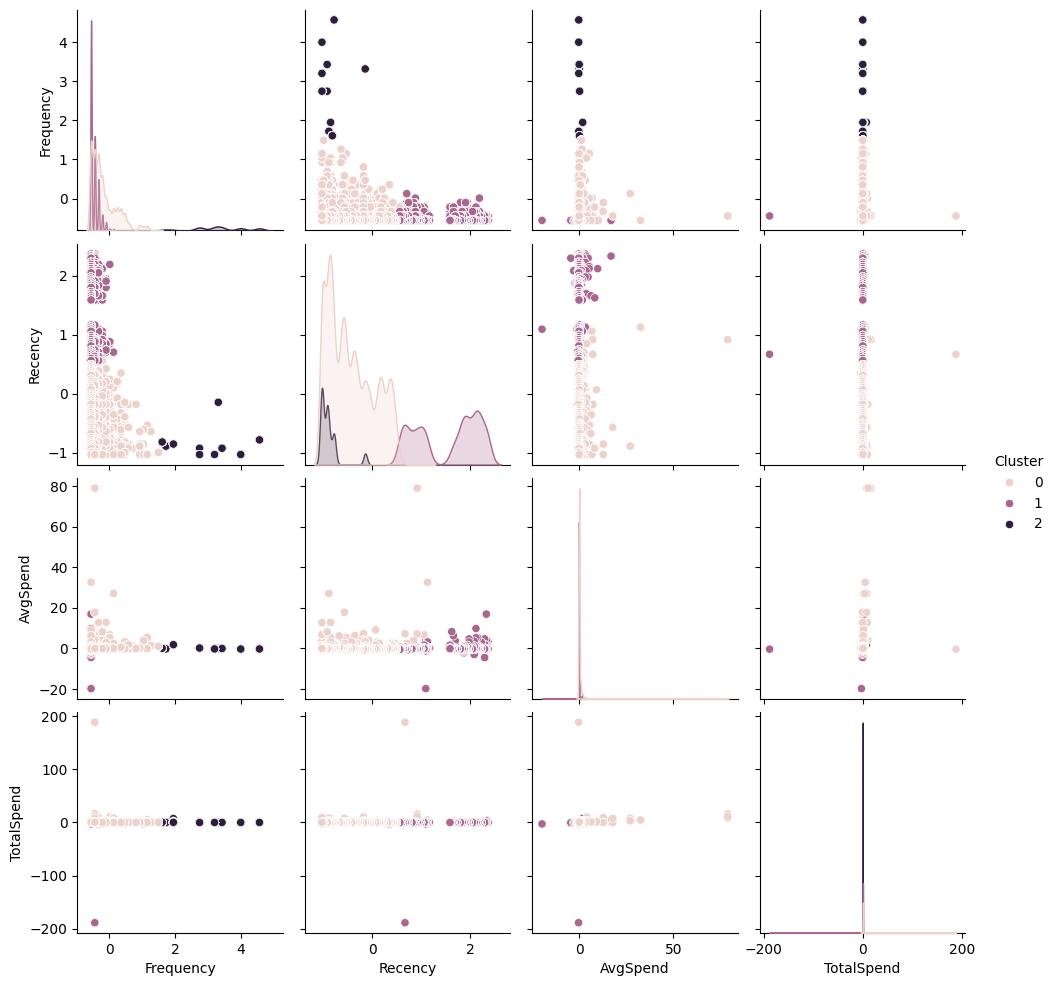

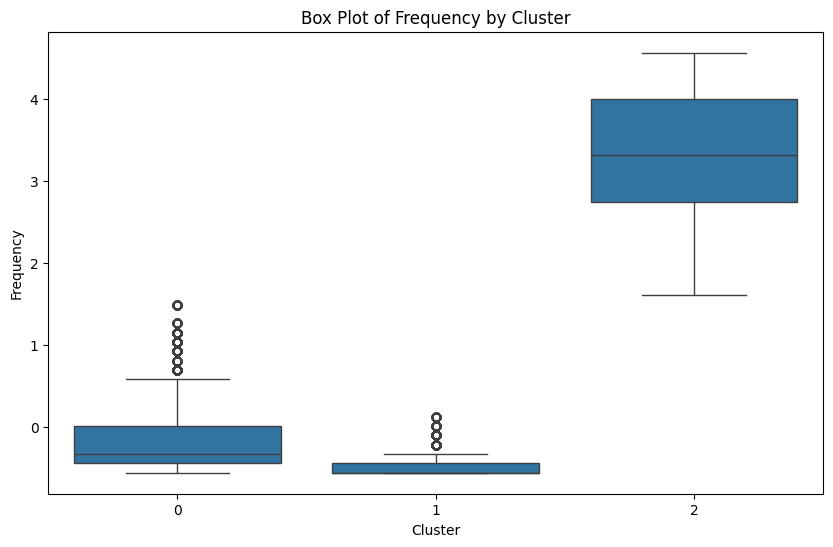

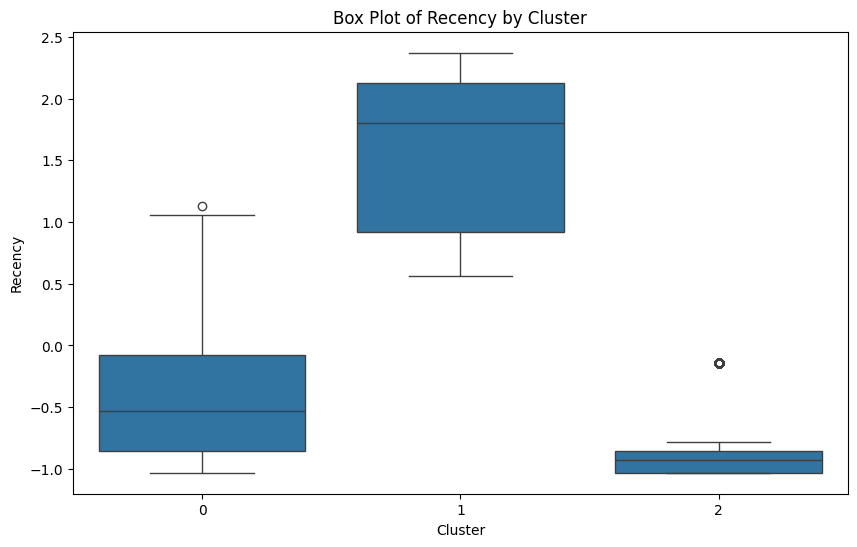

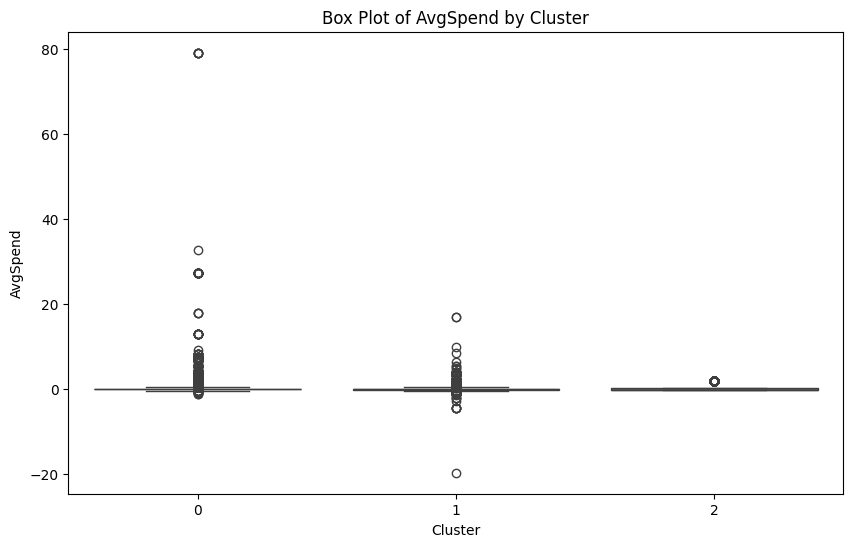

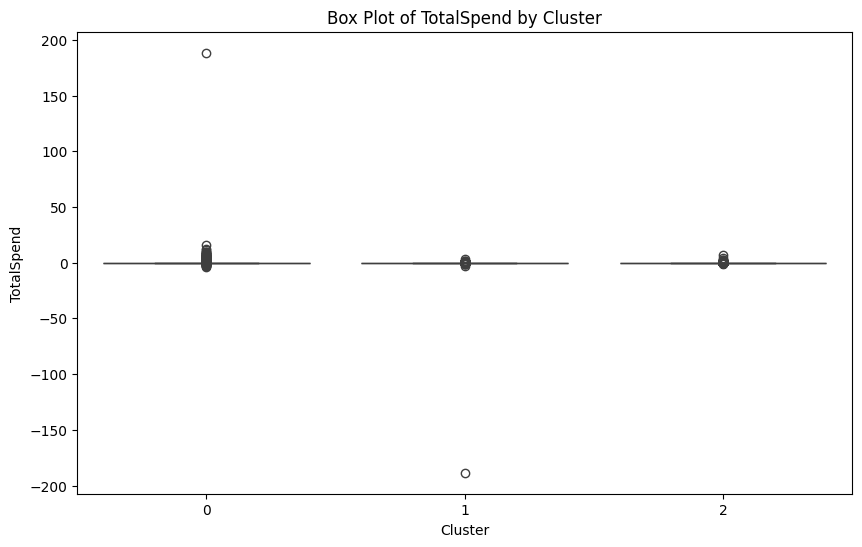

Cluster 2 Analysis:
          Quantity                    InvoiceDate    UnitPrice    CustomerID  \
count  5103.000000                           5103  5103.000000   5103.000000   
mean     -0.006958  2011-01-07 23:54:29.900058624     0.000547  15046.589065   
min      -0.276641            2010-12-01 08:26:00    -0.312986  12748.000000   
25%      -0.028380            2010-12-08 13:23:00    -0.195335  13089.000000   
50%      -0.025821            2011-01-05 11:52:00    -0.115333  14911.000000   
75%      -0.010465            2011-02-01 13:25:00     0.039966  15311.000000   
max       1.504693            2011-03-07 14:33:00     6.276397  17850.000000   
std       0.063949                            NaN     0.417105   1733.494601   

        TotalSpend    Frequency      Recency     AvgSpend  Cluster  
count  5103.000000  5103.000000  5103.000000  5103.000000   5103.0  
mean     -0.008581     3.342786    -0.893906    -0.060665      2.0  
min      -1.076334     1.604762    -1.030715    -0.2

In [13]:
# !pip install seaborn
# !pip install matplotlib
# !pip install scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the preprocessed data
df = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

frequency = df.groupby('CustomerID').InvoiceNo.nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
df = df.merge(frequency, on='CustomerID')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = df['InvoiceDate'].max()
df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (max_date - x.max()).days)

average_spend = df.groupby('CustomerID').TotalSpend.mean().reset_index()
average_spend.columns = ['CustomerID', 'AvgSpend']
df = df.merge(average_spend, on='CustomerID')

# Normalize the calculated features
features_to_normalize = ['Frequency', 'Recency', 'AvgSpend']
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
# --- END_SOLUTION


# Select the features for clustering
features = df[['Frequency', 'Recency', 'AvgSpend', 'TotalSpend']]

# Apply K-Means with the optimal number of clusters (assume 3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Recreate the DataFrame with the 'Cluster' column
# df = pd.concat([df, pd.DataFrame({'Cluster': kmeans.labels_})], axis=1)

# Display the first few rows with the cluster labels
print("\nData with Cluster Labels:")
print(df.head())

# Save the preprocessed data with cluster labels to a new CSV file
df.to_csv('OnlineRetail_With_Clusters.csv', index=False)

# Summary statistics by cluster
cluster_summary = df.groupby('Cluster').describe()

# Display the summary statistics
print("\nCluster Summary Statistics:")
print(cluster_summary)

# Pair plot to visualize relationships within clusters
print("\nPlotting Pair Plot...")
sns.pairplot(df, hue='Cluster', vars=['Frequency', 'Recency', 'AvgSpend', 'TotalSpend'])
plt.show()

# Box plots for each feature by cluster
features = ['Frequency', 'Recency', 'AvgSpend', 'TotalSpend']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()

# Analyze clusters
for cluster in df['Cluster'].unique():
    print(f'Cluster {cluster} Analysis:')
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.describe())
    print('\n')


Report

Project Overview
In this project, I aimed to enhance customer understanding through segmentation and targeting by analyzing transactional data from an e-commerce dataset. The goal was to identify distinct customer segments based on behavior and demographics, allowing for more tailored marketing strategies.

Data Collection and Preprocessing
Dataset: Online retail data containing transactional information such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.


Preprocessing: Handled missing values by removing rows without CustomerID and transactions with non-positive quantities or unit prices. Converted InvoiceDate to datetime format and calculated TotalSpend for each transaction.


Feature Engineering
Frequency: Number of transactions per customer.
Recency: Number of days since the last transaction.
Average Spend: Average spend per transaction.
Total Spend: Total spend across all transactions.

Clustering and Analysis
Algorithm: Applied K-Means clustering to segment customers.
Optimal Clusters: Determined the optimal number of clusters using the Elbow Method and Silhouette Scores, identifying three distinct customer segments.
Visualization: Created pair plots and box plots to visualize the distribution and relationships of features within each cluster.

Insights and Interpretation
Cluster 0: High-frequency buyers with moderate spending.
Cluster 1: Infrequent buyers with high average spending.
Cluster 2: Recent buyers with moderate frequency and spending.

Conclusion
This project provided valuable insights into customer behavior, enabling more personalized marketing strategies. The analysis revealed clear customer segments, each with distinct characteristics and purchasing patterns, facilitating targeted engagement and improved customer retention.